In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings

In [2]:
data = pd.read_csv(r"C:\Users\Shaik Sakhlaih\Downloads\Dataset Heart Disease.csv")
data

,Unnamed: 0,age,sex,chest pain type,resting bps,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,0,40,1,2,140,289.0,0,0,172,0,0.0,1,0
1,1,49,0,3,160,180.0,0,0,156,0,1.0,2,1
2,2,37,1,2,130,283.0,0,1,98,0,0.0,1,0
3,3,48,0,4,138,214.0,0,0,108,1,1.5,2,1
4,4,54,1,3,150,195.0,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043,297,68,0,3,120,211.0,0,0,115,0,1.5,1,1
1044,298,44,0,3,108,141.0,0,1,175,0,0.6,1,1
1045,299,52,1,1,128,255.0,0,1,161,1,0.0,2,0
1046,300,59,1,4,160,273.0,0,0,125,0,0.0,2,0


In [3]:
data.head()

,Unnamed: 0,age,sex,chest pain type,resting bps,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,0,40,1,2,140,289.0,0,0,172,0,0.0,1,0
1,1,49,0,3,160,180.0,0,0,156,0,1.0,2,1
2,2,37,1,2,130,283.0,0,1,98,0,0.0,1,0
3,3,48,0,4,138,214.0,0,0,108,1,1.5,2,1
4,4,54,1,3,150,195.0,0,0,122,0,0.0,1,0


In [4]:
data.tail()

,Unnamed: 0,age,sex,chest pain type,resting bps,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
1043,297,68,0,3,120,211.0,0,0,115,0,1.5,1,1
1044,298,44,0,3,108,141.0,0,1,175,0,0.6,1,1
1045,299,52,1,1,128,255.0,0,1,161,1,0.0,2,0
1046,300,59,1,4,160,273.0,0,0,125,0,0.0,2,0
1047,301,54,1,1,120,188.0,0,1,113,0,1.4,1,0


In [5]:
data.describe()

,Unnamed: 0,age,sex,chest pain type,resting bps,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000
mean,390.841603,53.325382,0.734733,2.817748,132.613550,245.172710,0.162214,0.606870,142.918893,0.368321,0.942366,1.532443,0.496183
std,307.916633,9.397822,0.441686,1.118649,17.367605,57.101359,0.368823,0.763313,24.427115,0.482579,1.100429,0.611023,0.500224
min,0.000000,28.000000,0.000000,1.000000,92.000000,85.000000,0.000000,0.000000,69.000000,0.000000,-0.100000,0.000000,0.000000
25%,130.750000,46.000000,0.000000,2.000000,120.000000,208.000000,0.000000,0.000000,125.000000,0.000000,0.000000,1.000000,0.000000
50%,262.000000,54.000000,1.000000,3.000000,130.000000,239.000000,0.000000,0.000000,144.000000,0.000000,0.600000,2.000000,0.000000
75%,657.250000,60.000000,1.000000,4.000000,140.000000,275.000000,0.000000,1.000000,162.000000,1.000000,1.600000,2.000000,1.000000
max,1189.000000,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [6]:
data.isnull().sum()

Unnamed: 0             0
age                    0
sex                    0
chest pain type        0
resting bps            0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048 entries, 0 to 1047
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           1048 non-null   int64  
 1   age                  1048 non-null   int64  
 2   sex                  1048 non-null   int64  
 3   chest pain type      1048 non-null   int64  
 4   resting bps          1048 non-null   int64  
 5   cholesterol          1048 non-null   float64
 6   fasting blood sugar  1048 non-null   int64  
 7   resting ecg          1048 non-null   int64  
 8   max heart rate       1048 non-null   int64  
 9   exercise angina      1048 non-null   int64  
 10  oldpeak              1048 non-null   float64
 11  ST slope             1048 non-null   int64  
 12  target               1048 non-null   int64  
dtypes: float64(2), int64(11)
memory usage: 106.6 KB


In [8]:
data.columns

Index(['Unnamed: 0', 'age', 'sex', 'chest pain type', 'resting bps',
       'cholesterol', 'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

In [9]:
x = data.drop(['target'], axis = 1)
y = data['target']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print("x_train",x_train.shape)
print("x_test",x_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

x_train (838, 12)
x_test (210, 12)
y_train (838,)
y_test (210,)


In [10]:
from sklearn.tree import DecisionTreeRegressor

In [17]:
regressor = DecisionTreeRegressor(max_depth=3, random_state=0)

In [19]:
regressor.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=0)

In [21]:
y_pred = regressor.predict(x_test)
y_pred

array([0.75925926, 0.92045455, 0.92045455, 0.92045455, 0.75925926,
       0.08      , 0.08      , 0.08      , 0.08      , 0.68421053,
       0.23648649, 0.23648649, 0.23648649, 0.68421053, 0.92045455,
       0.75925926, 0.92045455, 0.08      , 0.92045455, 0.75925926,
       0.68421053, 0.23648649, 0.75925926, 0.24193548, 0.23648649,
       0.08      , 0.23648649, 0.24193548, 0.23648649, 0.3255814 ,
       0.24193548, 0.23648649, 0.23648649, 0.92045455, 0.75925926,
       0.23648649, 0.24193548, 0.75925926, 0.24193548, 0.23648649,
       0.75925926, 0.24193548, 0.23648649, 0.08      , 0.75925926,
       0.92045455, 0.08      , 0.23648649, 0.23648649, 0.92045455,
       0.92045455, 0.92045455, 0.08      , 0.23648649, 0.92045455,
       0.3255814 , 0.92045455, 0.92045455, 0.92045455, 0.08      ,
       0.08      , 0.3255814 , 0.75925926, 0.08      , 0.92045455,
       0.75925926, 0.92045455, 0.75925926, 0.08      , 0.92045455,
       0.24193548, 0.92045455, 0.75925926, 0.92045455, 0.75925

In [22]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("The mean squared error :",mse)

The mean squared error : 0.13552660021528112


In [24]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("The r2 score error :",r2)

The r2 score error : 0.45710572536162253


[Text(0.5, 0.875, 'x[11] <= 1.5\nsquared_error = 0.25\nsamples = 838\nvalue = 0.49'),
 Text(0.25, 0.625, 'x[3] <= 3.5\nsquared_error = 0.163\nsamples = 419\nvalue = 0.205'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[10] <= 0.05\nsquared_error = 0.129\nsamples = 323\nvalue = 0.152'),
 Text(0.0625, 0.125, 'squared_error = 0.074\nsamples = 175\nvalue = 0.08'),
 Text(0.1875, 0.125, 'squared_error = 0.181\nsamples = 148\nvalue = 0.236'),
 Text(0.375, 0.375, 'x[10] <= 0.5\nsquared_error = 0.237\nsamples = 96\nvalue = 0.385'),
 Text(0.3125, 0.125, 'squared_error = 0.183\nsamples = 62\nvalue = 0.242'),
 Text(0.4375, 0.125, 'squared_error = 0.228\nsamples = 34\nvalue = 0.647'),
 Text(0.75, 0.625, 'x[3] <= 3.5\nsquared_error = 0.174\nsamples = 419\nvalue = 0.776'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[0] <= 668.0\nsquared_error = 0.222\nsamples = 205\nvalue = 0.668'),
 Text(0.5625, 0.125, 'squared_error = 0.183\nsamples = 162\nvalue = 0.759'),
 Text(0.6875, 0.125, 'sq

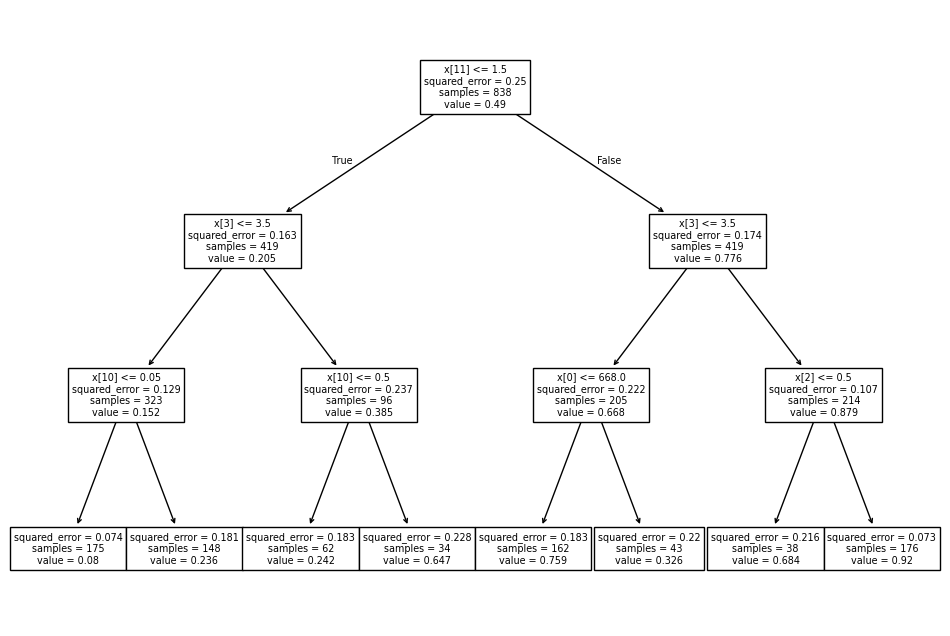

In [25]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(DTree.fit(x_train, y_train))